In [1]:
%load_ext autoreload
%autoreload 2

In [74]:
import warnings
warnings.filterwarnings('ignore')


## Networks meet Finance in Python
  []()

### Miguel Vaz
  []()

#### Amsterdam, 13$^{th}$ of March 2016
http://pydata.org/amsterdam2016/schedule/presentation/34/
https://github.com/mvaz/PyData2016-Amsterdam

# About me

@migueljvaz

Finance pays my bills:

- Risk Management (Consulting)
   * d-fine GmbH (2012 - )
- Software Developer
   * 360 Trading Networks (2010-2012)

Before that:
- PhD in Robotics at the Honda Research Institute
  - once I saw ASIMO naked (!)

# Currently

I'm interested in applications of networks to finance, in particular for risk management.

Modelling e.g. concentration risk, even information for investment strategies.

Question arose from several more skeptic colleagues:
- why model it with networks?
- how does it work?


<div class="col-xs-1"><h1>I</h1></div>
<div class="col-xs-2">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Heart_coraz%C3%B3n.svg/75px-Heart_coraz%C3%B3n.svg.png"/>
</div>
<div class="col-xs-6"><h1>networks</h1></div>

# Why?

Networks give us a way to quantify and reason about concepts that are already familiar to us.

"Frankfurt airport is an international **hub**"

"Ebola is a **contagious** disease"

"Lehman was too **central** to be let fail"

# Networks are great for representing structure

... and structure reveals much

![](pics/organisation.png)

http://www.bonkersworld.net/organizational-charts/

### Beautiful representations!

![](pics/linkedin.png)


http://inmaps.linkedinlabs.com/network


# Financial networks: debt exposure

Aggregate numbers at the national level

![](pics/interbank_exposure.png)

## Central Clearing 

Central clearing tries to mitigate counterparty risk by having one central actor that assumes the counterparty risk: the Central Counterpary (CCP).


![](pics/clearing.png)

Obligation for certain types of contracts introduced by the "European Market Infrastructure Regulation (EMIR)", and "Dodd–Frank Wall Street Reform and Consumer Protection Act".

## Central Clearing 

Changes the network structure of the system


![](pics/counterparties_fully_connected.png)

![](pics/counterparties_clearing.png)

## Structure of counterparty relationships exposes stock manipulation

![](pics/fraud1.png)

In [ ]:
Trading networks, abnormal motifs and stock manipulation,
Quantitative Finance Letters, 1, 1-8 
Zhi-Qiang Jiang , Wen-Jie Xie , Xiong Xiong , Wei Zhang , Yong-Jie Zhang & Wei-Xing Zhou (2013)
http://dx.doi.org/10.1080/21649502.2013.802877

![](pics/fraud_motif.png)

Trading networks, abnormal motifs and stock manipulation,
Quantitative Finance Letters, 1, 1-8 
Zhi-Qiang Jiang , Wen-Jie Xie , Xiong Xiong , Wei Zhang , Yong-Jie Zhang & Wei-Xing Zhou (2013)
http://dx.doi.org/10.1080/21649502.2013.802877

## Large credit portfolio: equity dependencies

Exposure to some obligors may be larger than could be expected, because the equity structure implies a loss to a given obligor if another defaults.

Diagram only considers equity structure.

![](pics/credit_portfolio.svg)

# Some vocabulary


A graph is a set of nodes and edges between them

$$G = (V, E)$$

The adjacency matrix of $G$ is given by
$$A_{i,j}:=
\begin{cases}
w(i,j) & \mbox{if}\ i \neq j \mbox{and}\ v_i \mbox{ is adjacent to } v_j \\
0 & \mbox{otherwise}
\end{cases}
$$



## Undirected, uweighted graph
![](pics/undirected.png)

## Weighted, directed graph
![](pics/weighted.png)

In [39]:
from IPython.display import  display, display_html

In [40]:
from kmeans_aux import *

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import output_notebook, figure, show, ColumnDataSource
TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"
output_notebook()

Loading BokehJS ...

# A short break from finance: using local structure for clustering

Let's assume a different dataset, with points selected from either of the following moon-shaped distributions. The distribution cannot be described by centroids.

In [42]:
X, true_labels = generate_two_moons()
p = figure(tools=TOOLS);
x,y = [list(t) for t in zip(*X)]
p.scatter(x, y, color='black', radius=0.02);
show(p);

# K-Means

A naïve density based method like K-Means does not capture the non-linearity of the dataset structure

In [43]:
k_means_2_labels, k_means_2_cluster_centres = do_kmeans(X, n_clusters=2, n_init=10)
src2 = create_datasource(X, k_means_2_labels, len(k_means_2_cluster_centres))

In [44]:
p = figure(tools=TOOLS);
p.scatter('x', 'y', color='fill_color', source=src2);
# alpha='alpha', radius='radius', 
show(p);

# Spectral Clustering

Takes only into account the local structure of the data.

Makes use of the concept of similarity, more general than that of distance.

Uses important results on the eigenvectors of the Laplacian of the similarity matrix, and clusters on a lower dimensionsional space.


The laplacian of the graph is given by 
$$ L = D - A $$
where $D$ is the degree matrix
$$D_{i,j}:=
\begin{cases}
\deg(v_i) & \mbox{if}\ i = j \\
0 & \mbox{otherwise}
\end{cases}
$$
where $\deg(v_i)$ is degree of the vertex i.


The eigenvectors of the graph Laplacian are very interesting!

### Unnormalized spectral clustering

#### Input:
- Similarity matrix $S \in R^{n \times n}$
- number $k$ of clusters to construct


#### Algorithm:
- Construct a similarity graph
$A$

- Let $W$ be its weighted adjacency matrix.

- Compute the unnormalized Laplacian
$L = D - A$

- Compute the first $k$ eigenvectors $u_1, \ldots, u_k$ of $L$

- Let $U \in R^{n \times k}$ be the matrix containing the vectors $u_1, \ldots, u_k$ as columns

- For $i = 1,\ldots, n$, let $y_i \in R^k$ be the vector corresponding to the i-th row of U
- Cluster the points $(y_i)_{i=1,\ldots,n}$ in $R^k$ with the k-means algorithm into clusters $C_1,\ldots,C_k$

#### Output:
Clusters $A_1,\ldots,A_k$ with $A_i = \{ j\, |\, y_j \in C_i\}$

## Similarity matrix / graph

Following similarity graphs can be defined

**$\epsilon-$neighborhood graph**
connects all points whose pairwise distances are smaller than $\epsilon$



**$k$-nearest neighbor graphs**
connects $v_i$ and $v_j$ if $v_j$ is among the $k$ nearest points of $k_i$


**fully connected graph**
outsources the locality modelling to the similarity function, such as
$s(x_i, x_j) = \exp\left( - \frac{|| x_i - x_j||^2}{ 2 \sigma^2} \right)$


*No full metric is required*
E.g. it is possible to compare:
- time-series based on their correlation,
- probability distributions,
- or strings on edit distance
- others


In [46]:
# Turn the distance into a similarity by applying a Gaussian kernel
distance = euclidean_distances(X, X, squared=True)
sig = 0.5
similarity = np.exp(-distance/sig)

<IPython.core.display.Javascript object>


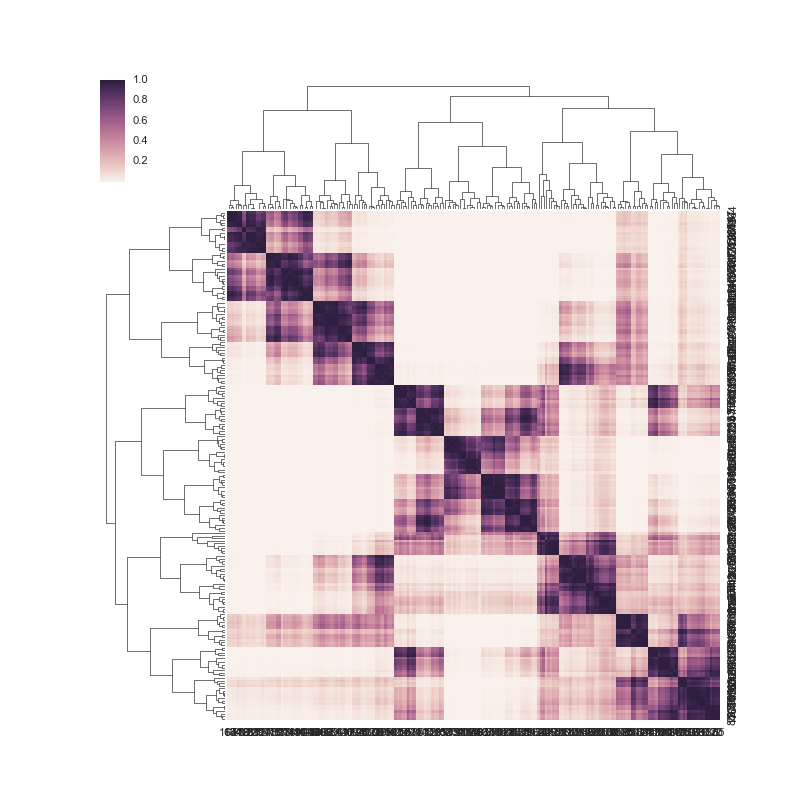

In [47]:
%matplotlib notebook
sns.clustermap(similarity);

In [48]:
A = create_adjacency_matrix(similarity, num_neighbours=10)

# Calculate the degree - the sum of all incoming weights to a vertex
D = np.diag(np.sum(A, axis=0))

# Unnormalised Laplacian Matrix
L = D - A

In [49]:
# Perform an Eigenvalue deccomposition of the Laplacian

from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(L)

sorted_inds = np.argsort(eig_vals.real, axis=0)

In [50]:
# Perform a dimensionality reduction

k = 3
F = eig_vecs[:,sorted_inds[0:k]]

# Do k-means on the reduced space
k_means_3_labels, k_means_3_cluster_centers = do_kmeans(F, n_clusters=3)
ind_3 = np.argsort(k_means_3_labels)

<IPython.core.display.Javascript object>


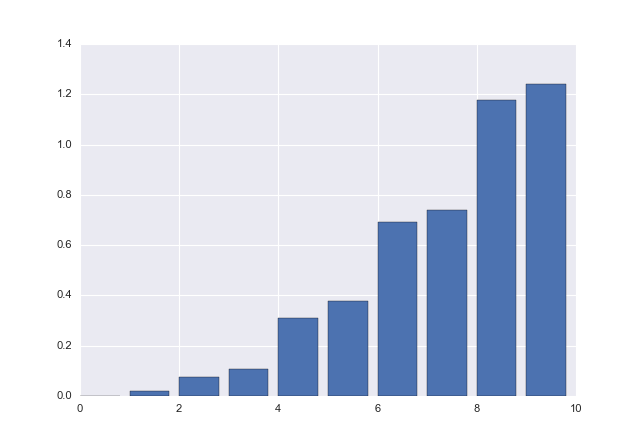

<Container object of 10 artists>

In [51]:
%matplotlib notebook
plt.bar(range(10), eig_vals.real[sorted_inds[0:10]]);
# plt.imshow(similarity[ind_3].T[ind_3])

In [52]:
from networkx.generators import random_graphs
from networkx.generators import classic

In [58]:
import networkx as nx
g = nx.from_numpy_matrix(A)

In [59]:
g0 = random_graphs.empty_graph()
g0.add_nodes_from(g)
for v in g.edges_iter():
    g0.add_edge(v[0], v[1])

In [66]:
from graphs import *

In [75]:
p_g0 = figure(toolbar_location='left', tools=TOOLS)

ds_g0, ds_g0 = prepare_datasources(g0, k=.05, iterations=150)
plot_graph(p_g0, ds_g0, ds_g0)

show(p_g0);

## Results with $k=3$ clusters

In [62]:
# k_means_2_labels, k_means_2_cluster_centres = do_kmeans(X, n_clusters=2, n_init=10)
src3 = create_datasource(X, k_means_3_labels, 3) #len(k_means_3_cluster_centres))

In [76]:
p = figure(toolbar_location='left', tools=TOOLS);
p.scatter('x', 'y', color='fill_color', source=src3);
show(p)

## Other applications

#### Outlier detection

Construct a sparse similarity graph by applying a threshold *r* on the distance.

Determine the connected components.

Outliers are components with a number of nodes smaller than a threshold *p*

![](pics/Iris_outlier_graph_small.png)

More info in 
https://github.com/dmarx/Topological-Anomaly-Detection



# Back to finance: can we infer structure from the (stock) market?

##  Correlation of several financial time series


![xxx](pics/method.png)


(picture taken from the paper)

$$Ret_t = \frac{P_t}{P_{t-1}}$$

$$ R_t = \frac{Ret_t - \overline{Ret}}{\sigma_{Ret}} $$

Then compute the windowed pairwise correlation of each pair of assets

$$X = R_{i,t_0\ldots t_k}$$
$$Y = R_{j,t_0\ldots t_k}$$

$$\rho(X,Y)=\frac{Cov(X,Y)}{\sigma_X \sigma_Y} = 
\frac{E[(X- \mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$


$$
\rho_{XY} =\frac{\sum ^n _{i=1}(X_i - \bar{X})(Y_i - \bar{X})}{\sqrt{\sum ^n _{i=1}(X_i - \bar{X})^2}
                                                                   \sqrt{\sum ^n _{i=1}(Y_i - \bar{Y})^2}}
$$

## Eigenvalues of the correlation matrix (DAX 30)

![](pics/correlation_eigenvector.png)

## Use structure from correlation matrix to code diversity


Identify baskets of assets that are diversified (e.g. 20, 30 assets)

Spread of risk across financial markets: better to invest in the peripheries
F. Pozzi, T. Di Matteo and T. Aste
2013, Nature Scientific Reports 3, Article number: 1665 doi:10.1038/srep01665
http://www.nature.com/srep/2013/130416/srep01665/full/srep01665.html


![xxx](pics/paper.png)



IPython notebooks and material in 
[https://github.com/mvaz/PyData2014-Berlin](https://github.com/mvaz/PyData2014-Berlin)

If you preprocess your data such that each row has $\mu=0$ and $\sigma = 1$
 (which disallows constant vectors!), then correlation reduces to cosine:

$$Cor(X,Y)=\frac{Cov(X,Y)}{\sigma_X \sigma_Y} = 
\frac{E[(X- \mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y} = E[X Y]= \frac{1}{dim<X,Y>}$$

Under the same conditions, squared Euclidean distance also reduces to cosine:

$$d^2Euclid(X,Y)= \Sigma_i (X_i-Y_i)^2= \Sigma_i X_i + \Sigma_i Yi - 2 \Sigma_i X_i Y_i = 2  <X,Y>$$


[other notebook]

## The similarity matrix can be seen as a graph

Different methods for sparsifying the matrix were tested: a topological argument (Planar Maximally Filtered Graph) was used.


In this paper the authors were interested in centrality, instead of community structure.
The gist of the paper is by choosing assets in the periphery, the portfolios become more diversified.

![xxx](pics/graph.png)

(picture taken from the paper)

## Results

For each point in time:

Build asset baskets:

- market portfolio (equally weighted for all assets)
- random picked stocks
- currently best performing 
- PMFG portfolio


Construct portfolios
- Equally weighted
- Optimized (Markowitz)


Evaluate SNR for periods following construction
$$ \frac{\overline{r}}{s} $$

## Equally weighted portfolios

- Risk is well distributed across the network: no correlation between centrality and signal-to-noise ratio.
- PMFG portfolios perform well

![](pics/uniform_portfolios.png)

## Markowitz portfolios (no short selling)

Market portfolio profits the most from Markowitz. 

Central baskets profit less, which means that the diversification is already very good.

Large central portfolios already very good.



![](pics/markowitz_portfolios.png)

# Take-home message(s)

Structure is important. Network theory helps you
- groups in your data (community detection, outlier detection)
- measure what is central

Lots of structure in finance

Local methods can help reveal the structure of your data.

You don't always need a distance metric. Often, a similarity function is enough, e.g.
- correlation between time series
- human label
- co-occurrence

## Thanks for listening

# Part 4: back to clouds (t-SNE)

Goal is to embedd high-dimensional objects into a lower-dimensional space (e.g. 2D).

Sophisticated modelling of the effects of the local structure onto the low dimensional embedding.

![](pics/animation.gif)

More info :

https://github.com/oreillymedia/t-SNE-tutorial

https://lvdmaaten.github.io/tsne/


## Local structure

#### On high-dimensional space
Given a set of N high-dimensional objects $\mathbf{x}_1, \dots, \mathbf{x}_N$, t-SNE first computes probabilities $p_{ij}$ that are proportional to the similarity of objects $\mathbf{x}_i$ and $\mathbf{x}_j$, as follows:

$$p_{j|i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$$,

Symmetric distance
$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}$$



#### On lower-dimensional space
Heavy tailed t-Student distribution helps model dissimilar points far in a map

$$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_{k \neq l} (1 + \lVert \mathbf{y}_k - \mathbf{y}_l\rVert^2)^{-1}}$$

### Global minimization of divergence

Goal is to minimize the Kuhlback-Leibler divergence between two probability distributions


$$KL(P||Q) = \sum_{i \neq j} p_{ij} \, \log \frac{p_{ij}}{q_{ij}}$$

helps preserve local structure


### Optimization per stochastic gradient descent

The gradient turns out to be easy is easy to compute

$$
\frac{\partial \, KL(P || Q)}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij}) g\left( \left| x_i - x_j\right| \right) u_{ij},\\
\\
\quad \textrm{where} \, g(z) = \frac{z}{1+z^2}
$$

Here, $u_{ij}$ is a unit vector going from $y_j$ to $y_i$.
This gradient expresses the sum of all spring forces applied to map point $i$.

Adaptations to big data sets already available using the Barns Hut

## Practical considerations on Spectral Clustering


### Choice of $k$
More of an art than a science. Run the algorithm with several configurations and try to minimize the 'inertia'
$$\sum_{i=0}^{n} min_{\mu_j \in C} (||x_j - \mu_i||^2)$$
, i.e. the sum of the intra-cluster distances.
The (related) concept of "silhouette" is also important.

### Choice of Laplacian
No theoretical argument for each of the versions.

### Data size
Not too many different clusters. Better for non-linear clusters.

Similarity matrix is quadratic on the number of samples... no "BigData"

It might also be helpful to perform a dimensionality reduction first with e.g. PCA.

### More info
http://www.cs.yale.edu/homes/spielman/561/2009/lect02-09.pdf
